<a href="https://colab.research.google.com/github/22110100342211010034-a11/UTS_Machine-Learning/blob/main/UTS%20NAive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

**MEMBACA DATSET**

In [ ]:
# Load dataset
data = pd.read_csv("/content/bmw.csv", delimiter=';')

# Lihat 5 data pertama
display(data.head())

# Cek struktur data
data.info()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


**CEK APAKAH ADA DATA YANG DUPLIKAT**

In [ ]:
# Cek data kosong (null)
print("=== CEK DATA NULL ===")
print(data.isnull().sum())

# Cek duplikat
print("\nJumlah duplikat:", data.duplicated().sum())

# Hapus duplikat jika ada
data = data.drop_duplicates()

=== CEK DATA NULL ===
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Jumlah duplikat: 117


**MEMISAHKAN FITUR DAN LABEL**

In [ ]:
# Tentukan fitur dan label
X = data[['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']]
y = data['model']

**NORMALISASI DAN SPLIT DATA**

In [ ]:
# Normalisasi fitur agar skala serupa

# 1. Encode categorical features in X
X_encoded = pd.get_dummies(X, columns=['transmission', 'fuelType'])

# 2. Encode the target variable y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Apply SMOTE for resampling (as SMOTE was imported)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42
)

print("Data training:", X_train.shape)
print("Data testing:", X_test.shape)

Data training: (46732, 14)
Data testing: (11684, 14)


**TRAINING MODEL NAIVE BAYES**


In [ ]:
# ⿨ BUAT & LATIH MODEL NAIVE BAYES
model = GaussianNB()

print("\n=== Memulai Training Model (Naive Bayes) ===")
start_time_train_nb = time.time() # <-- CATAT WAKTU MULAI

# Latih model
model.fit(X_train, y_train)

end_time_train_nb = time.time() # <-- CATAT WAKTU SELESAI
waktu_training_nb = end_time_train_nb - start_time_train_nb

print(f"✅ Training Selesai. Waktu: {waktu_training_nb:.4f} detik")



=== Memulai Training Model (Naive Bayes) ===
✅ Training Selesai. Waktu: 0.1225 detik


**EVALUASI MODEL**


================ HASIL EVALUASI ================
Akurasi             : 43.1445%
AUC Score           : 0.9068
Waktu Eksekusi (prediksi): 0.0947 detik

Classification Report:
               precision    recall  f1-score   support

    1 Series     0.4442    0.3925    0.4168       507
    2 Series     1.0000    0.0021    0.0042       478
    3 Series     0.0000    0.0000    0.0000       526
    4 Series     0.2778    0.0111    0.0213       451
    5 Series     0.4769    0.0618    0.1093       502
    6 Series     0.1470    0.7812    0.2474       457
    7 Series     0.2683    0.0657    0.1056       502
    8 Series     0.3019    0.2009    0.2412       463
          M2     0.5177    0.9170    0.6618       494
          M3     0.6378    0.4061    0.4963       490
          M4     0.3881    0.4969    0.4358       485
          M5     0.5260    0.9674    0.6815       522
          M6     0.6105    0.1231    0.2049       471
          X1     0.3828    0.2447    0.2986       474
          X2   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


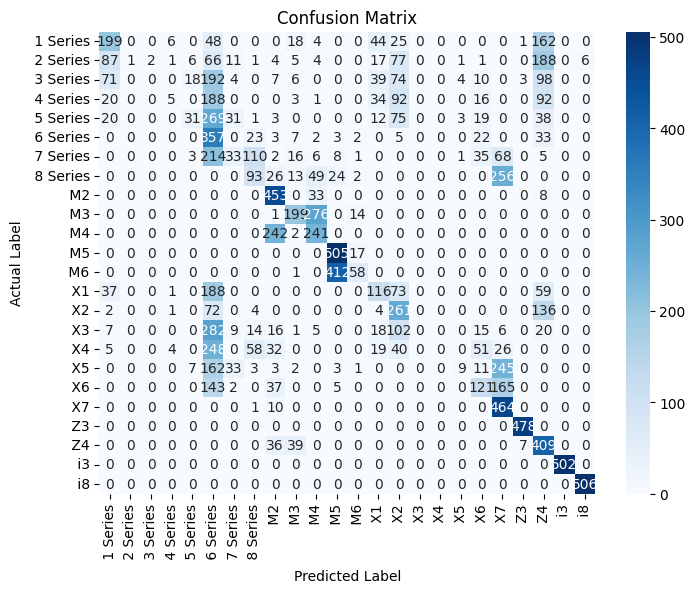

In [ ]:
# 2. Lakukan Prediksi dan Ukur Waktu Eksekusi
start_time = time.time()
y_pred = model.predict(X_test)
execution_time = time.time() - start_time


# 3. Hitung Metrik Evaluasi
# Dapatkan probabilitas prediksi untuk perhitungan AUC
y_pred_proba = model.predict_proba(X_test)

# Hitung Akurasi
acc_score = accuracy_score(y_test, y_pred)

# Hitung AUC Score untuk kasus multi-kelas
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')


# 4. Tampilkan Hasil Evaluasi di Terminal
print("================ HASIL EVALUASI ================")
print(f"Akurasi             : {acc_score*100:.4f}%")
print(f"AUC Score           : {auc_score:.4f}")
print(f"Waktu Eksekusi (prediksi): {execution_time:.4f} detik\n")

# Tampilkan Classification Report dengan 4 angka desimal
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_, digits=4))


# 5. Visualisasikan Confusion Matrix
print("================ Confusion Matrix ================")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6)) # Ukuran gambar bisa disesuaikan
sns.heatmap(
    cm,
    annot=True,
    fmt='d', # Format angka sebagai integer
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()



**PREDIKSI MANUAL DARI USER**


In [ ]:
# === PREDIKSI MANUAL (INPUT DARI USER) ===

print("\n=== PREDIKSI MANUAL ===")

# Input data dari user
year = int(input("Masukkan tahun mobil : "))
price = float(input("Masukkan harga mobil (mata uang Inggris (£)): "))
transmission = input("Masukkan jenis transmisi (1 : Manual / 2 : Automatic / 3 : Semi-Auto): ").strip()
mileage = float(input("Masukkan jarak tempuh (mileage): "))
fuelType = input("Masukkan jenis bahan bakar (1 : Petrol / 2 : Diesel / 3 : Hybrid / 4 : Electric / 5 : Other): ").strip()
tax = float(input("Masukkan pajak kendaraan (tax (mata uang Inggris (£))): "))
mpg = float(input("Masukkan konsumsi bahan bakar (mpg (berapa mil yang ditempuh per galon bahan bakar)): "))
engineSize = float(input("Masukkan ukuran mesin (engineSize): "))

# Buat DataFrame dari input
input_data = pd.DataFrame([{
    'year': year,
    'price': price,
    'mileage': mileage,
    'tax': tax,
    'mpg': mpg,
    'engineSize': engineSize,
    'transmission': transmission,
    'fuelType': fuelType
}])

# Encode kategori agar sesuai dengan model
input_encoded = pd.get_dummies(input_data, columns=['transmission', 'fuelType'])
input_encoded = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Normalisasi dengan scaler yang sama
input_scaled = scaler.transform(input_encoded)

# Prediksi
prediction = model.predict(input_scaled)
predicted_label = le.inverse_transform(prediction)[0]

print(f"\n🚗 Prediksi Model Mobil BMW: {predicted_label}")


=== PREDIKSI MANUAL ===
Masukkan tahun mobil : 2013
Masukkan harga mobil (mata uang Inggris (£)): 120000
Masukkan jenis transmisi (1 : Manual / 2 : Automatic / 3 : Semi-Auto): 3
Masukkan jarak tempuh (mileage): 7850
Masukkan jenis bahan bakar (1 : Petrol / 2 : Diesel / 3 : Hybrid / 4 : Electric / 5 : Other): 2
Masukkan pajak kendaraan (tax (mata uang Inggris (£))): 120
Masukkan konsumsi bahan bakar (mpg (berapa mil yang ditempuh per galon bahan bakar)): 30
Masukkan ukuran mesin (engineSize): 2

🚗 Prediksi Model Mobil BMW:  X6
